
Discussion Related With Outliers And Impact On Machine Learning!!
Which Machine LEarning Models Are Sensitive To Outliers?

    Naivye Bayes Classifier--- Not Sensitive To Outliers
    SVM-------- Not Sensitive To Outliers
    Linear Regression---------- Sensitive To Outliers
    Logistic Regression------- Sensitive To Outliers
    Decision Tree Regressor or Classifier---- Not Sensitive
    Ensemble(RF,XGboost,GB)------- Not Sensitive
    KNN--------------------------- Not Sensitive
    Kmeans------------------------ Sensitive
    Hierarichal------------------- Sensitive
    PCA-------------------------- Sensitive
    Neural Networks-------------- Sensitive



In [2]:
 import pandas as pd

In [3]:
df=pd.read_csv('titanic.csv')

In [4]:
df['Age'].isnull().sum()

177

In [5]:
import seaborn as sns

C:\Users\Pallavi\anaconda3dekstop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age', ylabel='Density'>

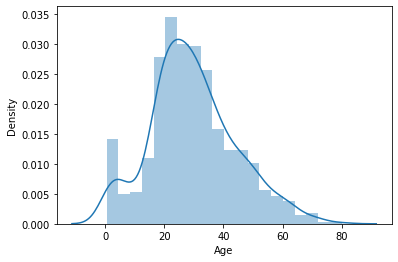

In [6]:
sns.distplot(df['Age'].dropna())

C:\Users\Pallavi\anaconda3dekstop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age', ylabel='Density'>

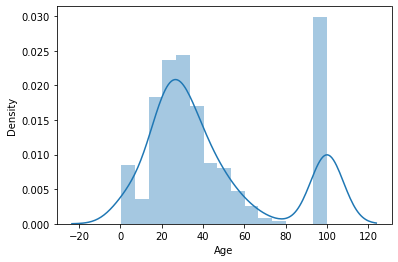

In [7]:
sns.distplot(df['Age'].fillna(100))

#### Gaussian Distribution

Text(0, 0.5, 'Number of Passenger')

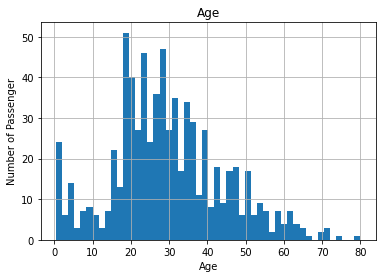

In [8]:
figure=df['Age'].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of Passenger')

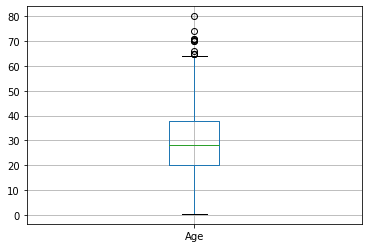

In [9]:
figure=df.boxplot(column='Age')

In [10]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Assuming age follows the GAussian distribution
we will calculate the boundries to differentiate the outliers

In [11]:
upper_boundary=df.Age.mean()+3*df.Age.std()
lower_boundary=df.Age.mean()-3*df.Age.std()
print(upper_boundary),print(lower_boundary),print(df.Age.mean())

73.27860964406095
-13.88037434994331
29.69911764705882


(None, None, None)

#### Compute the IQR 

In [12]:
IQR= df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

17.875

In [13]:
lower_bridge= df.Age.quantile(0.25)-(IQR*1.5)
upper_bridge= df.Age.quantile(0.75)+(IQR*1.5)
print(upper_bridge),print(lower_bridge)

64.8125
-6.6875


(None, None)

Text(0, 0.5, 'Number of Passenger')

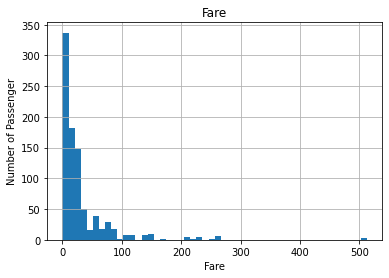

In [14]:
figure=df['Fare'].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of Passenger')

<AxesSubplot: >

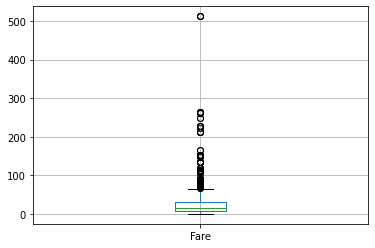

In [15]:
df.boxplot(column='Fare')

#### when the dataset is skewed

In [16]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
IQR= df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

upper_boundary=df.Fare.mean()+3*df.Fare.std()
lower_boundary=df.Fare.mean()-3*df.Fare.std()
print(upper_boundary),print(lower_boundary),print(df.Age.mean())

In [18]:
lower_bridge= df.Fare.quantile(0.25)-(IQR*1.5)
upper_bridge= df.Fare.quantile(0.75)+(IQR*1.5)
print(upper_bridge),print(lower_bridge)

65.6344
-26.724


(None, None)

In [19]:
lower_bridge= df.Fare.quantile(0.25)-(IQR*3)
upper_bridge= df.Fare.quantile(0.75)+(IQR*3)
print(upper_bridge),print(lower_bridge)

100.2688
-61.358399999999996


(None, None)

In [20]:
data=df.copy()

In [21]:
data.loc[data['Age']>=73,'Age']=73

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'Number of Passenger')

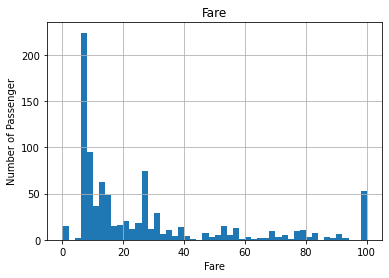

In [24]:
figure=data['Fare'].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of Passenger')

Text(0, 0.5, 'Number of Passenger')

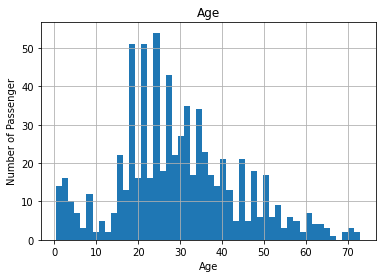

In [25]:
figure=data['Age'].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of Passenger')

In [26]:
data.loc[data['Age']<=0,'Age']=0

Text(0, 0.5, 'Number of Passenger')

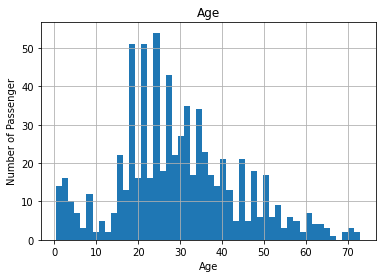

In [27]:
figure=data['Age'].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of Passenger')

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score:{}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score:{}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.6604477611940298
roc_auc_score:0.6512135176651306


In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score:{}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score:{}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.6753731343283582
roc_auc_score:0.7096774193548389
